# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score? Bitcoin
2. Which coin had the highest negative score? Bitcoin
3. Which coin had the highest positive score? Bitcoin

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

from newsapi import NewsApiClient

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/quinnluong/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv('.env')
api_key = os.getenv('news_api')

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q="bitcoin", language="en", sort_by="relevancy", page_size=100,
)

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q="ethereum", language="en", sort_by="relevancy"
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in bitcoin_news['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })

    except AttributeError:
        pass

btc_df = pd.DataFrame(btc_sentiments)

cols = ['date', 'text', 'compound', 'positive', 'negative', 'neutral']

btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.0,0.942
1,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.0,1.000
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.0,0.829
3,2021-04-13,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.0,0.865
4,2021-04-23,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,0.0,1.000


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })

    except AttributeError:
        pass

eth_df = pd.DataFrame(eth_sentiments)

eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-04,Their investors call them disruptive innovator...,-0.2144,0.054,0.111,0.835
1,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.000,0.829
2,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.000,0.966
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.000,1.000
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.000,0.909


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.149250,0.062750,0.024210,0.913060
std,0.346211,0.071146,0.043991,0.087031
min,-0.680800,0.000000,0.000000,0.662000
25%,0.000000,0.000000,0.000000,0.849750
50%,0.000000,0.049000,0.000000,0.920500
75%,0.391725,0.103750,0.047250,1.000000
max,0.845500,0.275000,0.219000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.120525,0.041850,0.009250,0.948900
std,0.285566,0.059469,0.029097,0.064801
min,-0.340000,0.000000,0.000000,0.790000
25%,0.000000,0.000000,0.000000,0.924000
50%,0.000000,0.017000,0.000000,0.964000
75%,0.164300,0.056000,0.000000,1.000000
max,0.817600,0.210000,0.111000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the higher mean positive score of 0.062750.

Q: Which coin had the highest compound score?

A: Bitcoin also has the highest compound score of 0.2960 recently on May 7.

Q. Which coin had the highest positive score?

A: Bitcoin also has the highest positive score of 0.058 recently on May 7.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
print(stopwords.words('do','are','will'))

# Expand the default stopwords list if necessary


In [12]:
# Complete the tokenizer function
def tokenizer(text):
    sw= set(stopwords.words('english'))
    regex= re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words= word_tokenize(re_clean)
    lem=[lemmatizer.lemmatize(word) for word in words]
    tokens= [word.lower() for word in lem if word.lower() not in sw ]
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
nltk.download('reuters')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

btc_df['tokens'] = btc_df.text.apply(tokenizer)
btc_df.head()

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/quinnluong/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/quinnluong/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/quinnluong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/quinnluong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,date,text,compound,positive,negative,neutral,tokens
0,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.0,0.942,"[shares, square, today, american, fintech, com..."
1,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.0,1.000,"[teslas, relationship, bitcoin, dalliance, acc..."
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.0,0.829,"[cryptocurrency, continues, gain, mainstream, ..."
3,2021-04-13,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.0,0.865,"[crypto, industry, whole, ha, seen, momentous,..."
4,2021-04-23,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,0.0,1.000,"[cryptocurrency, price, continued, tumble, fri..."


In [14]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df.text.apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-04,Their investors call them disruptive innovator...,-0.2144,0.054,0.111,0.835,"[investor, call, disruptive, innovator, detrac..."
1,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.000,0.829,"[cryptocurrency, continues, gain, mainstream, ..."
2,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.000,0.966,"[venmo, jumping, aboard, cryptocurrency, bandw..."
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.000,1.000,"[new, york, cnn, businessbitcoin, price, conti..."
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.000,0.909,"[creator, behind, cryptopunks, one, popular, n..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
N=2
btc_n_gram = tokenizer(btc_df.text.str.cat())
btc_counter = Counter(ngrams(btc_n_gram, N))
print(dict(btc_counter))

{('shares', 'square'): 1, ('square', 'today'): 1, ('today', 'american'): 1, ('american', 'fintech'): 1, ('fintech', 'company'): 2, ('company', 'reported'): 1, ('reported', 'staggering'): 1, ('staggering', 'billion'): 1, ('billion', 'revenue'): 1, ('revenue', 'q'): 1, ('q', 'earnings'): 1, ('earnings', 'report'): 1, ('report', 'far'): 1, ('far', 'ahead'): 1, ('ahead', 'expected'): 1, ('expected', 'tally'): 1, ('tally', 'bi'): 1, ('bi', 'charsteslas'): 1, ('charsteslas', 'relationship'): 1, ('relationship', 'bitcoin'): 1, ('bitcoin', 'dalliance'): 1, ('dalliance', 'according'): 1, ('according', 'comment'): 1, ('comment', 'made'): 1, ('made', 'company'): 1, ('company', 'cfo'): 1, ('cfo', 'dubbed'): 1, ('dubbed', 'master'): 1, ('master', 'coin'): 1, ('coin', 'zach'): 1, ('zach', 'kirkhorn'): 1, ('kirkhorn', 'earnings'): 1, ('earnings', 'call'): 1, ('call', 'monday'): 1, ('monday', 'instead'): 1, ('instead', 'compan'): 1, ('compan', 'charscryptocurrency'): 1, ('charscryptocurrency', 'contin

In [17]:
# Generate the Ethereum N-grams where N=2
eth_n_gram = tokenizer(eth_df.text.str.cat())
eth_counter = Counter(ngrams(eth_n_gram, N))
print(dict(eth_counter))

{('investor', 'call'): 1, ('call', 'disruptive'): 1, ('disruptive', 'innovator'): 1, ('innovator', 'detractors'): 1, ('detractors', 'like'): 1, ('like', 'north'): 1, ('north', 'carolina'): 1, ('carolina', 'attorney'): 1, ('attorney', 'general'): 1, ('general', 'josh'): 1, ('josh', 'stein'): 1, ('stein', 'call'): 1, ('call', 'dirty'): 1, ('dirty', 'scammer'): 1, ('scammer', 'leda'): 1, ('leda', 'health'): 1, ('health', 'cofounder'): 1, ('cofounder', 'madison'): 1, ('madison', 'campbell'): 1, ('campbell', 'liesel'): 1, ('liesel', 'vaidya'): 1, ('vaidya', 'th'): 1, ('th', 'charscryptocurrency'): 1, ('charscryptocurrency', 'continues'): 1, ('continues', 'gain'): 1, ('gain', 'mainstream'): 1, ('mainstream', 'acceptance'): 1, ('acceptance', 'paypal'): 1, ('paypal', 'announced'): 1, ('announced', 'added'): 1, ('added', 'bitcoin'): 1, ('bitcoin', 'ethereum'): 3, ('ethereum', 'bitcoin'): 1, ('bitcoin', 'cash'): 1, ('cash', 'litecoin'): 1, ('litecoin', 'venmo'): 1, ('venmo', 'app'): 1, ('app', '

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
btc_top_10 = token_count(btc_counter, 10)
btc_top_10

[(('charsby', 'reuters'), 18),
 (('virtual', 'currency'), 14),
 (('illustration', 'taken'), 14),
 (('currency', 'bitcoin'), 12),
 (('representation', 'virtual'), 11),
 (('seen', 'front'), 11),
 (('front', 'stock'), 11),
 (('stock', 'graph'), 11),
 (('graph', 'illustration'), 11),
 (('bitcoin', 'seen'), 9)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
eth_top_10 = token_count(eth_counter, 10)
eth_top_10

[(('charsby', 'reuters'), 4),
 (('representation', 'virtual'), 4),
 (('virtual', 'currency'), 4),
 (('currency', 'ethereum'), 4),
 (('ethereum', 'seen'), 4),
 (('seen', 'front'), 4),
 (('front', 'stock'), 4),
 (('stock', 'graph'), 4),
 (('graph', 'illustration'), 4),
 (('illustration', 'taken'), 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

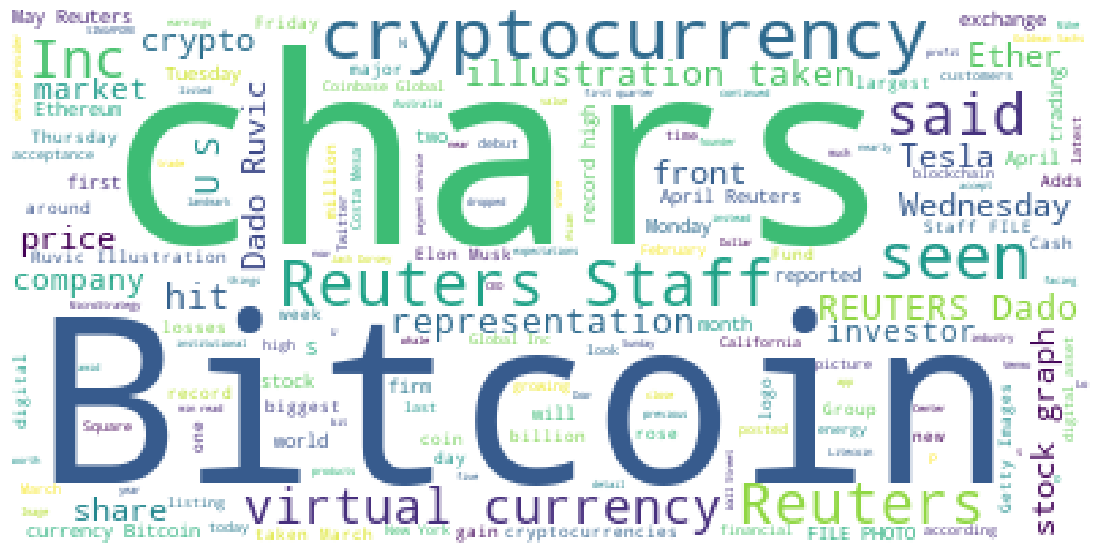

In [22]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud(background_color='white').generate(btc_df.text.str.cat())
btc_wc
plt.axis('off')
plt.imshow(btc_wc)

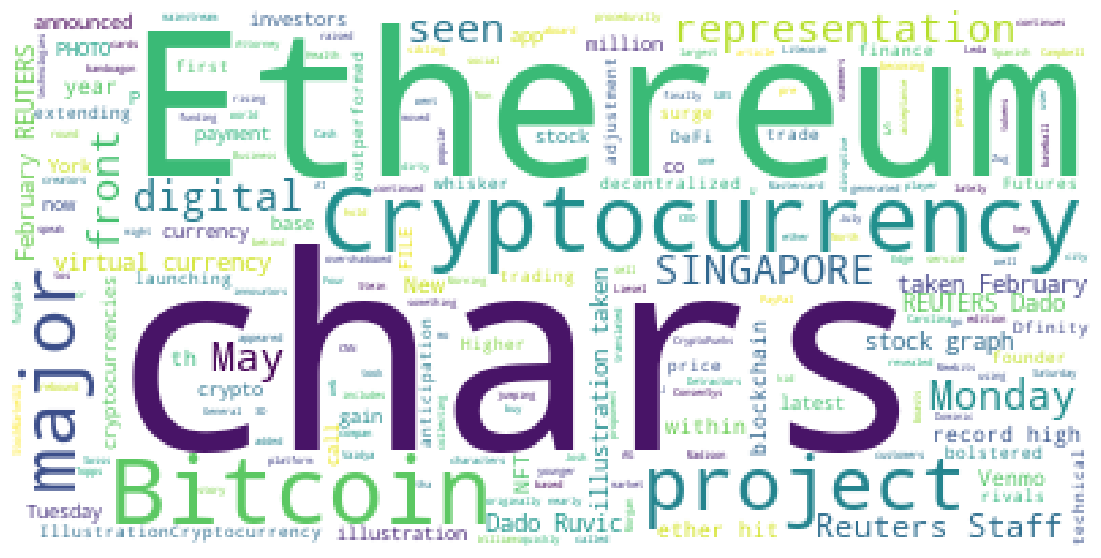

In [23]:
# Generate the Ethereum word cloud
eth_wc = WordCloud(background_color='white').generate(eth_df.text.str.cat())
eth_wc
plt.axis('off')
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
btc_concat = btc_df.text.str.cat()
btc_concat

'Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars]Tesla’s relationship with bitcoin is not a dalliance, according to the comments made by the company’s CFO and dubbed “master of coin” Zach Kirkhorn during an earnings call Monday. Instead, the compan… [+3073 chars]Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars]The crypto industry as a whole has seen a momentous year of growth, heavily spurred on by the entrance of institutional investors adopting bitcoin due to its store of value properties. The 2020 spike… [+4675 chars]Cryptocurrency prices continued to tumble Friday with Bitcoin leading the charge, with prices for the internet currency dipping below $50,000 f

In [28]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_concat)
btc_doc
# Add a title to the document
btc_doc.user_data['Title'] = 'BTC NER'

In [29]:
# Render the visualization
displacy.render(btc_doc, style ='ent')

In [30]:
# List all Entities
for i in btc_doc.ents:
    print(i.text, i.label_)

more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
CFO ORG
Zach Kirkhorn PERSON
Monday DATE
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
a momentous year DATE
2020 DATE
Friday DATE
Bitcoin PERSON
50,000 MONEY
first ORDINAL
early March DATE
Bitcoin PERSON
Zuckerberg PERSON
two CARDINAL
Max PERSON
Bitcoin PERSON
Musk PERSON
Tesla PERSON
Tesla PERSON
first quarter DATE
$438m MONEY
315 MONEY
Bitcoin ORG
Jack Dorsey PERSON
Babel Finance ORG
Monday DATE
Tuesday DATE
Venmo PERSON
Four CARDINAL
chars]New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
Reuters ORG
Reuters ORG
Inc PERSON
Monday DATE
two CARDINAL
Crusoe Energy ORG
two CARDINAL
today DATE
Musk PERSON
Dogecoin GPE
Twitter PRODUCT
Dogecoin GPE
Reuters ORG
April 12 DATE
Reuters ORG
Monday DATE
Dorsey PERSON
Twitter PRODUCT
Wednesday DATE
Elon Musk PERSON
BBC ORG
Kuber PERSON
India GPE
Thursday DATE
$25 million MONEY
Indi 

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
eth_concat = eth_df.text.str.cat()
eth_concat

'Their investors call them disruptive innovators. Detractors like North Carolina Attorney General Josh Stein call them dirty scammers. But Leda Health co-founders Madison Campbell and Liesel Vaidya th… [+8679 chars]Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars]Venmo is jumping aboard the cryptocurrency bandwagon.\xa0\r\nThe social payment service announced on Tuesday that its customers can now buy, hold, and sell cryptocurrencies within the Venmo app.\xa0\r\nFour cr… [+1524 chars]New York (CNN Business)Bitcoin prices continued their rebound Saturday, rising about 6% to nearly $58,000. But the world\'s largest cryptocurrency has been overshadowed lately by its younger sibling, … [+866 chars]The creators behind CryptoPunks, one of the most popular NFT projects on the web, just revealed their latest project called Meebits. 

In [32]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_concat)
eth_doc
# Add a title to the document
eth_doc.user_data['Title'] = 'ETH NER'

In [33]:
# Render the visualization
displacy.render(eth_doc, style ='ent')

In [34]:
# List all Entities
for i in eth_doc.ents:
    print(i.text, i.label_)

North Carolina GPE
Josh Stein PERSON
Madison Campbell PERSON
Liesel Vaidya PERSON
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Tuesday DATE
Venmo PERSON
Four CARDINAL
chars]New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
CryptoPunks ORG
one CARDINAL
NFT ORG
Meebits PRODUCT
20,000 CARDINAL
3D ORG
Ethereum ORG
$65 million MONEY
J.P. Morgan PERSON
Mastercard PERSON
UBS AG ORG
Reuters ORG
February 19, 2021 DATE
SINGAPORE GPE
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency PERSON
Dfinity ORG
July 2018 DATE
Swiss NORP
Dominic Williams PERSON
StockMarketUS Stock Futures Edge Higher ORG
Monday DATE
U.S. GPE
Monday DATE
Topps GPE
first ORDINAL
NFT ORG
Spanish NORP
AI ORG
Cryptocurrencies ORG
today DATE
Vitalik Buterin PERSON
27-year-old DATE
Reuters ORG
SINGAPORE GPE
May 3 DATE
Reuters ORG
Monday DATE
3,000 MONEY
last weeks DATE
Europe LOC
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency P

---